# EDA (Exploratory Data Analysis)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
from textblob import TextBlob
import boto3
import os
from io import StringIO

In [2]:
warnings.filterwarnings("ignore")

In [4]:
# Get the current working directory
current_dir = os.getcwd()
# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)

key_df = pd.read_csv(os.path.join(parent_dir, 'british-airway-user.csv'), index_col=None)

In [7]:
# Initialize a session using Amazon S3
s3_client = boto3.client('s3', aws_access_key_id=key_df['Access key ID'][0], aws_secret_access_key=key_df['Secret access key'][0])

# Name of the S3 bucket
bucket_name = 'british-airway'

# Function to get the latest CSV file
def get_latest_csv_file(bucket_name):
    csv_files = []
    response = s3_client.list_objects_v2(Bucket=bucket_name)
    for obj in response.get('Contents', []):
        if obj['Key'].endswith('.csv'):
            csv_files.append({'Key': obj['Key'], 'LastModified': obj['LastModified']})
    
    # Sort the files by last modified date in descending order
    latest_csv_file = sorted(csv_files, key=lambda x: x['LastModified'], reverse=True)[0]
    return latest_csv_file['Key']

# Function to read a CSV file from S3 into a DataFrame
def read_csv_to_df(bucket_name, file_key):
    csv_obj = s3_client.get_object(Bucket=bucket_name, Key=file_key)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')
    df = pd.read_csv(StringIO(csv_string))
    return df

# Get the latest CSV file
latest_csv_file = get_latest_csv_file(bucket_name)

# Read the latest CSV file into a DataFrame
df = read_csv_to_df(bucket_name, latest_csv_file)

df.head()


,id,date_review,day_review,month_review,month_review_num,year_review,verified,verified.1,name,month_fly,...,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,score,experience,recommended,review
0,0,2024-04-03,3,April,4,2024,True,True,Mike Flynn,March,...,3.0,5.0,3.0,4.0,NaN,3,3.75,Fair,True,Check in fast and friendly. Security a breeze....
1,1,2024-04-02,2,April,4,2024,True,True,David Williams,March,...,5.0,1.0,1.0,5.0,1.0,3,2.60,Fair,False,Flew business class from Doha to London on 31s...
2,2,2024-04-02,2,April,4,2024,True,True,E Dodson,March,...,3.0,1.0,1.0,2.0,1.0,1,1.60,Poor,False,This is the first time I have seen the new Clu...
3,3,2024-03-28,28,March,3,2024,True,True,C Down,March,...,4.0,4.0,5.0,4.0,NaN,4,4.25,Good,True,Starting off at Heathrow Terminal 3. Check in ...
4,4,2024-03-28,28,March,3,2024,False,False,Robert Walls,March,...,4.0,3.0,NaN,2.0,NaN,1,3.00,Poor,False,We have flown this route with EasyJet regularl...


In [8]:
df.dtypes

id                    int64
date_review          object
day_review            int64
month_review         object
month_review_num      int64
year_review           int64
verified               bool
verified.1             bool
name                 object
month_fly            object
month_fly_num       float64
year_fly            float64
month_year_fly       object
country              object
aircraft             object
aircraft_1           object
aircraft_2           object
type                 object
seat_type            object
route                object
origin               object
destination          object
transit              object
seat_comfort        float64
cabit_serv          float64
food                float64
ground_service      float64
wifi                float64
money_value           int64
score               float64
experience           object
recommended            bool
review               object
dtype: object

In [9]:
df.month_year_fly =  pd.to_datetime(df['month_year_fly'])
df.date_review = pd.to_datetime(df['date_review'])

In [10]:
df.dtypes

id                           int64
date_review         datetime64[ns]
day_review                   int64
month_review                object
month_review_num             int64
year_review                  int64
verified                      bool
verified.1                    bool
name                        object
month_fly                   object
month_fly_num              float64
year_fly                   float64
month_year_fly      datetime64[ns]
country                     object
aircraft                    object
aircraft_1                  object
aircraft_2                  object
type                        object
seat_type                   object
route                       object
origin                      object
destination                 object
transit                     object
seat_comfort               float64
cabit_serv                 float64
food                       float64
ground_service             float64
wifi                       float64
money_value         

In [11]:
df.head()

,id,date_review,day_review,month_review,month_review_num,year_review,verified,verified.1,name,month_fly,...,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,score,experience,recommended,review
0,0,2024-04-03,3,April,4,2024,True,True,Mike Flynn,March,...,3.0,5.0,3.0,4.0,NaN,3,3.75,Fair,True,Check in fast and friendly. Security a breeze....
1,1,2024-04-02,2,April,4,2024,True,True,David Williams,March,...,5.0,1.0,1.0,5.0,1.0,3,2.60,Fair,False,Flew business class from Doha to London on 31s...
2,2,2024-04-02,2,April,4,2024,True,True,E Dodson,March,...,3.0,1.0,1.0,2.0,1.0,1,1.60,Poor,False,This is the first time I have seen the new Clu...
3,3,2024-03-28,28,March,3,2024,True,True,C Down,March,...,4.0,4.0,5.0,4.0,NaN,4,4.25,Good,True,Starting off at Heathrow Terminal 3. Check in ...
4,4,2024-03-28,28,March,3,2024,False,False,Robert Walls,March,...,4.0,3.0,NaN,2.0,NaN,1,3.00,Poor,False,We have flown this route with EasyJet regularl...


## General Analysis

### Null Analysis

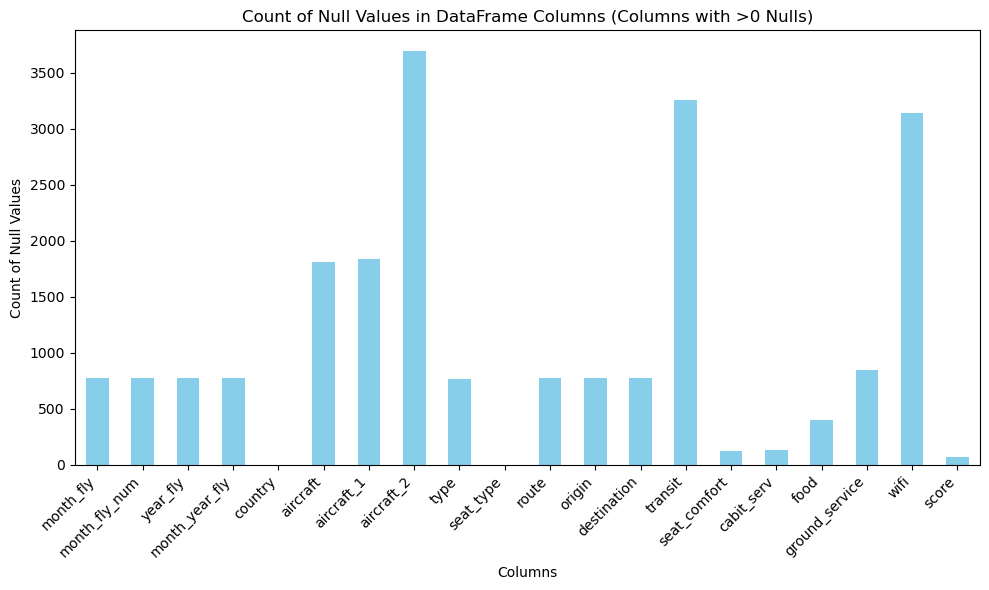

In [12]:
# Count null values in each column
null_counts = df.isnull().sum()

# Filter columns with more than zero null values
null_counts_gt_zero = null_counts[null_counts > 0]

# Plotting the null counts
plt.figure(figsize=(10, 6))
null_counts_gt_zero.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in DataFrame Columns (Columns with >0 Nulls)')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

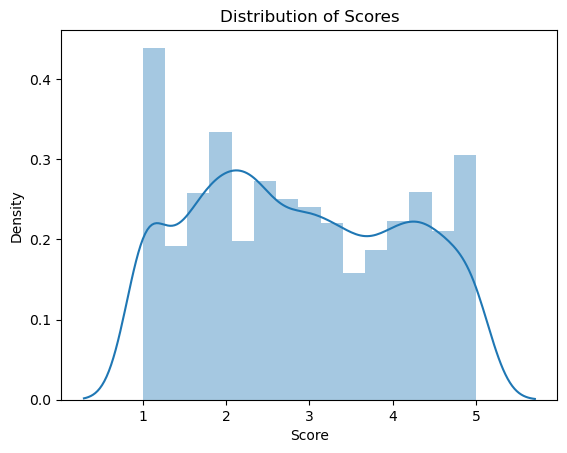

In [13]:
# Plotting distribution plot using Seaborn
sns.distplot(df['score'], kde=True, hist=True, bins=15)  # Adjust bins as needed
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

In [14]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value','score']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df

,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,score
count,3661.000000,3649.000000,3377.000000,2933.000000,638.000000,3781.000000,3713.000000
mean,2.870527,3.249109,2.715724,2.780089,1.921630,2.682359,2.875918
std,1.361716,1.490150,1.440886,1.458283,1.343676,1.471017,1.218496
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.800000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.750000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Service Analysis 

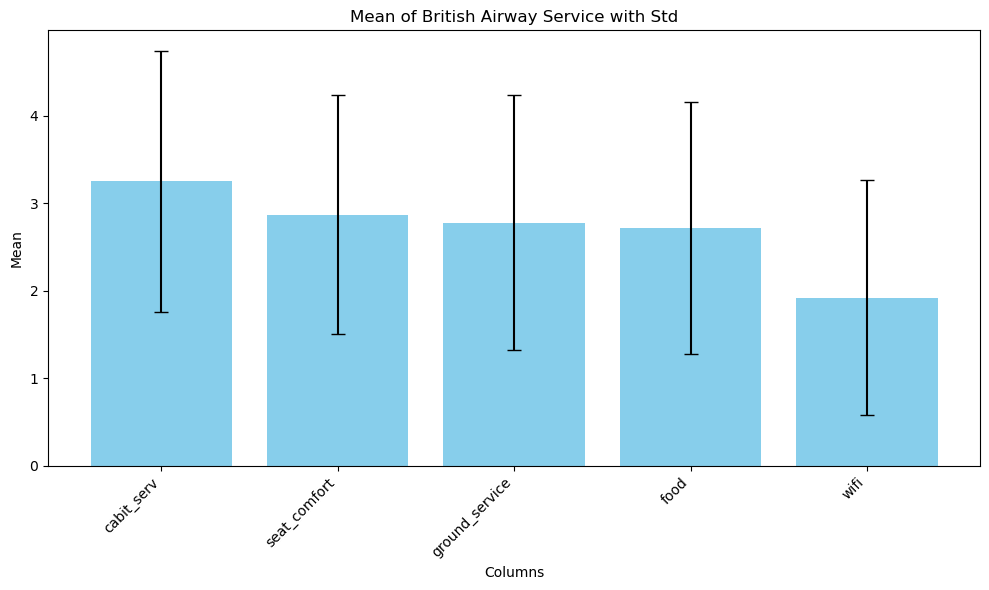

In [15]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of British Airway Service with Std')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [16]:
# Define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [17]:
# Apply the function to your review column
df['sentiment_score'] = df['review'].apply(calculate_sentiment)

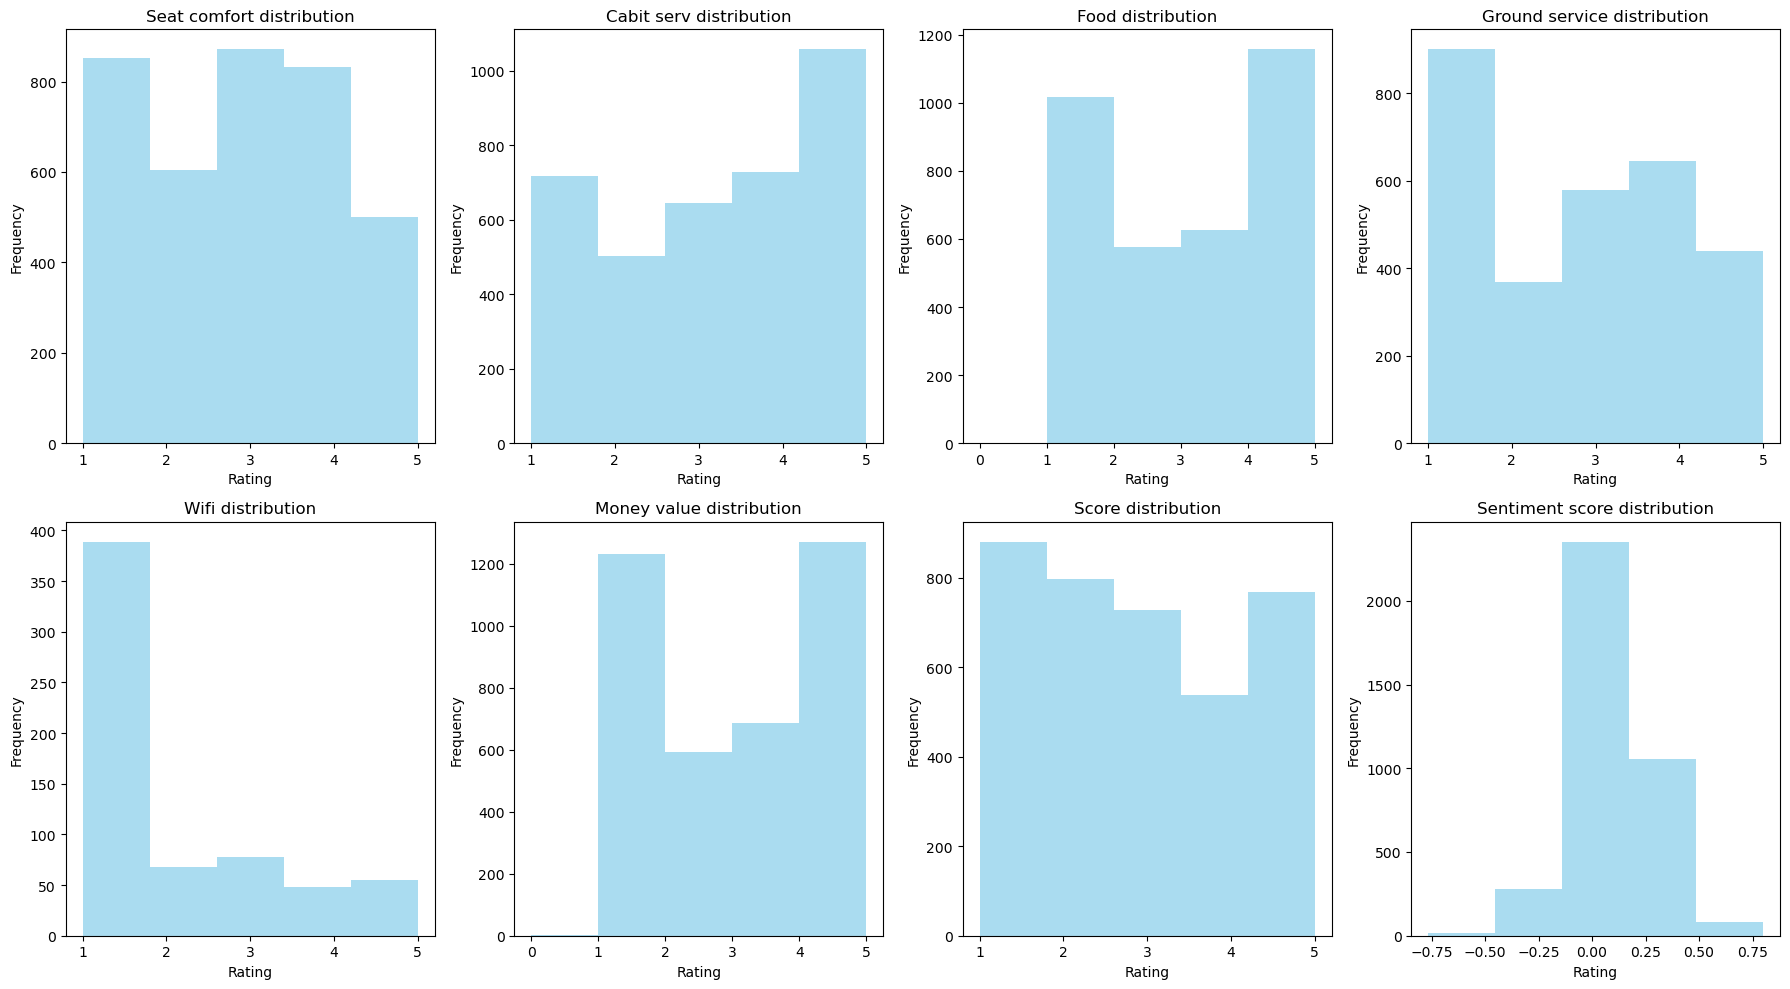

In [18]:
# Define columns of interest
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value', 'score', 'sentiment_score']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot histograms
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=5, color='skyblue', alpha=0.7)
    axes[i].set_title(column.replace("_", " ").capitalize() + ' distribution')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


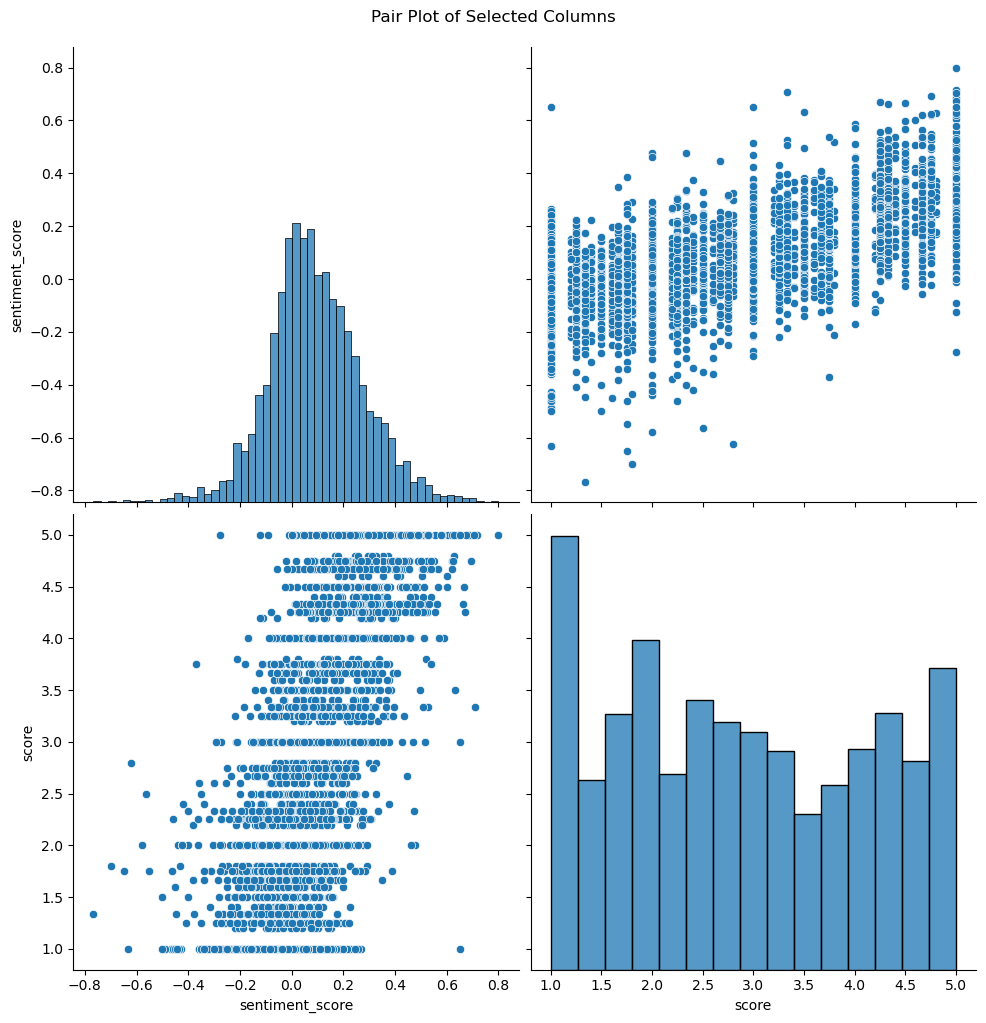

In [19]:
# Plotting pair plot using Seaborn
sns.pairplot(df[['sentiment_score','score']], height=5)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

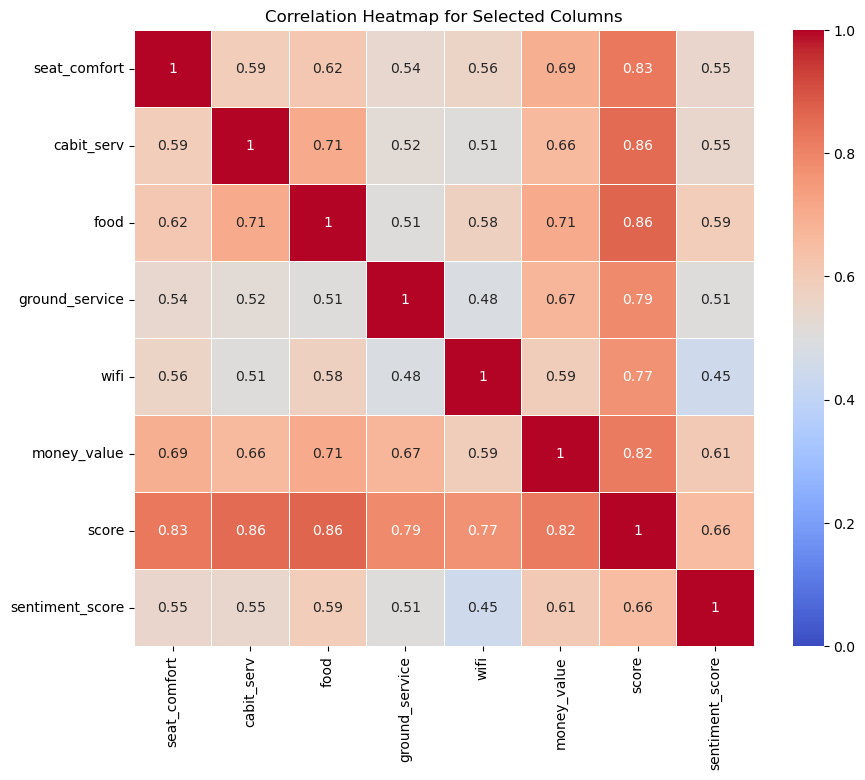

In [20]:
# Select only the columns of interest
df_selected = df[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

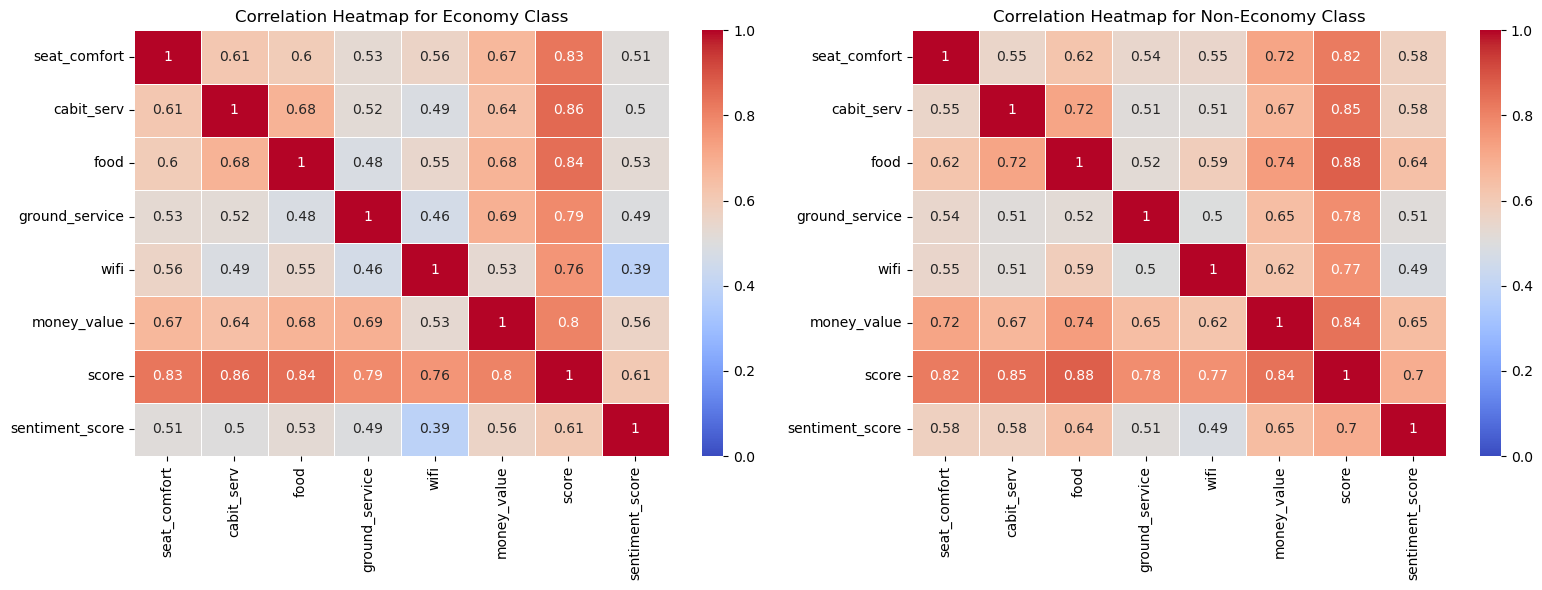

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Iterate over seat types
for idx, seat_type in enumerate(['Economy Class', 'Non-Economy Class']):
    # Filter the DataFrame based on seat type
    if seat_type == 'Economy Class':
        df_filtered = df[df['seat_type'] == 'Economy Class']
    else:
        df_filtered = df[df['seat_type'] != 'Economy Class']

    # Select only the columns of interest
    df_selected = df_filtered[columns]

    # Calculate the correlation matrix
    corr_matrix = df_selected.corr()

    # Create a heatmap with color scale from 0 to 1
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, ax=axes[idx])
    title = f'Correlation Heatmap for {seat_type}'
    axes[idx].set_title(title)

plt.tight_layout()
plt.show()

In [22]:
### top 2 most important factos is food/beverages and Seat comfort for non economy seat type, for economy, it's the gound service that matter the most. We will vaildate this using feature engineering in the MoneyValueModel

### Ground Experience (economy class)

In [23]:
# Let's check the bad experience about the ground service from the economy class

In [24]:
## Filter out people in the Economy Class that have bad ground service experience
economy_df = df.loc[(df['seat_type'] == 'Economy Class')&(df['ground_service'] <= 2)]

In [25]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 4 to 2989
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                763 non-null    int64         
 1   date_review       763 non-null    datetime64[ns]
 2   day_review        763 non-null    int64         
 3   month_review      763 non-null    object        
 4   month_review_num  763 non-null    int64         
 5   year_review       763 non-null    int64         
 6   verified          763 non-null    bool          
 7   verified.1        763 non-null    bool          
 8   name              763 non-null    object        
 9   month_fly         762 non-null    object        
 10  month_fly_num     762 non-null    float64       
 11  year_fly          762 non-null    float64       
 12  month_year_fly    762 non-null    datetime64[ns]
 13  country           763 non-null    object        
 14  aircraft          304 non-null

In [26]:
economy_df = economy_df[['verified', 'month_fly', 'month_fly_num', 'year_fly', 'month_year_fly', 'country', 'type','origin','destination','transit', 'ground_service', 'money_value', 'recommended', 'review']]

In [27]:
# Now, let's check their route so see where they are travelling from and to

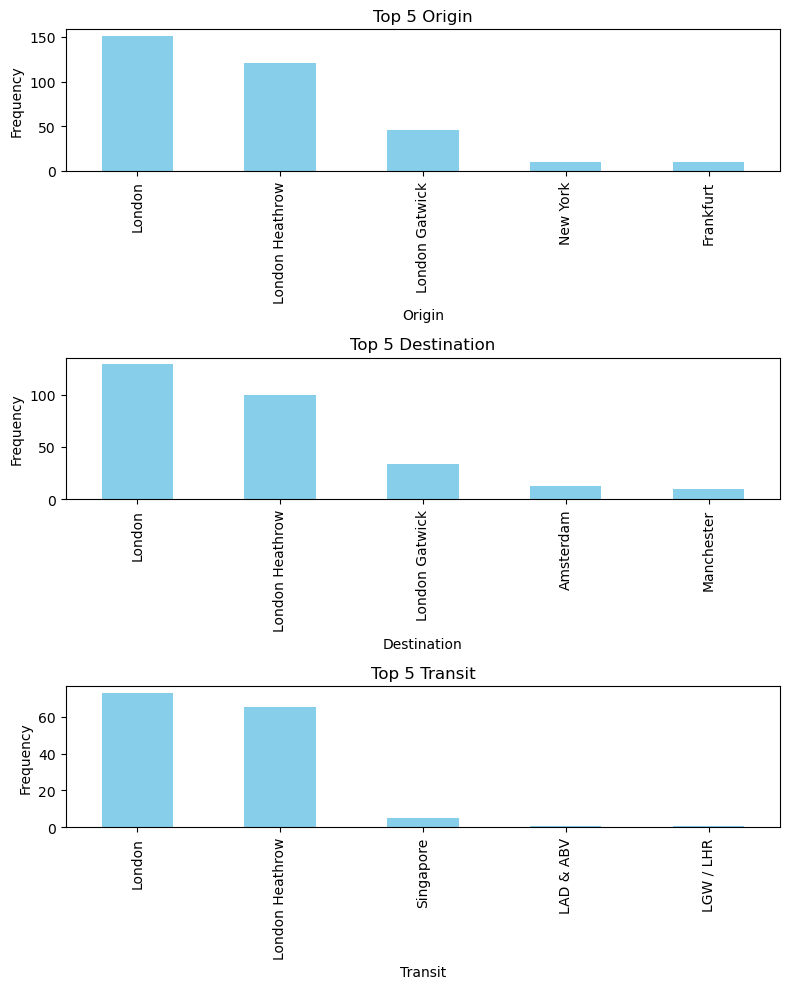

In [28]:
# Select only the top 5 values for each column
top_origins = economy_df['origin'].value_counts().head(5)
top_destinations = economy_df['destination'].value_counts().head(5)
top_transits = economy_df['transit'].value_counts().head(5)

# Plot the bar chart
fig, axes = plt.subplots(nrows=3, figsize=(8, 10))

for i, (column, top_values) in enumerate(zip(['origin', 'destination', 'transit'], [top_origins, top_destinations, top_transits])):
    # Plot the bar chart
    top_values.plot(kind='bar', ax=axes[i], color='skyblue')

    # Set title and labels
    axes[i].set_title(f'Top 5 {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [29]:
# So they are travelling and arriving mostly in London and especially the Heathrow airport/London Gatwick

#### London/London Heathrow Analysis

In [30]:
london_filter = (
    economy_df['origin'].str.contains('London', case=False, na=False) |
    economy_df['destination'].str.contains('London', case=False, na=False) |
    economy_df['transit'].str.contains('London', case=False, na=False)
)

# Apply the filter to the DataFrame
london_df = economy_df[london_filter]



In [31]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 4 to 2989
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   verified        738 non-null    bool          
 1   month_fly       737 non-null    object        
 2   month_fly_num   737 non-null    float64       
 3   year_fly        737 non-null    float64       
 4   month_year_fly  737 non-null    datetime64[ns]
 5   country         738 non-null    object        
 6   type            737 non-null    object        
 7   origin          738 non-null    object        
 8   destination     737 non-null    object        
 9   transit         157 non-null    object        
 10  ground_service  738 non-null    float64       
 11  money_value     738 non-null    int64         
 12  recommended     738 non-null    bool          
 13  review          738 non-null    object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(7)

In [32]:
london_df.columns

Index(['verified', 'month_fly', 'month_fly_num', 'year_fly', 'month_year_fly',
       'country', 'type', 'origin', 'destination', 'transit', 'ground_service',
       'money_value', 'recommended', 'review'],
      dtype='object')

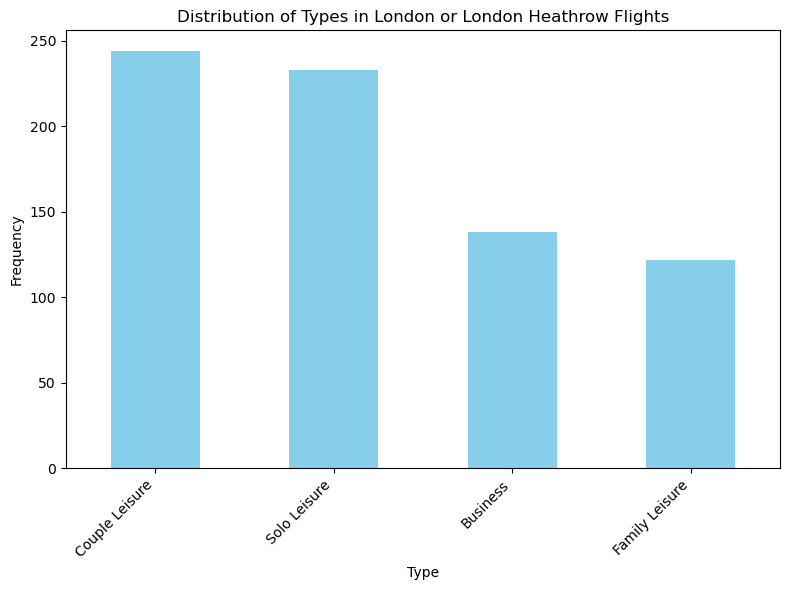

In [33]:
# Count the occurrences of each type
type_counts = london_df['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Distribution of Types in London or London Heathrow Flights')
plt.xlabel('Type')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [34]:
# mostly solo people and couple so they will need lots of assitant

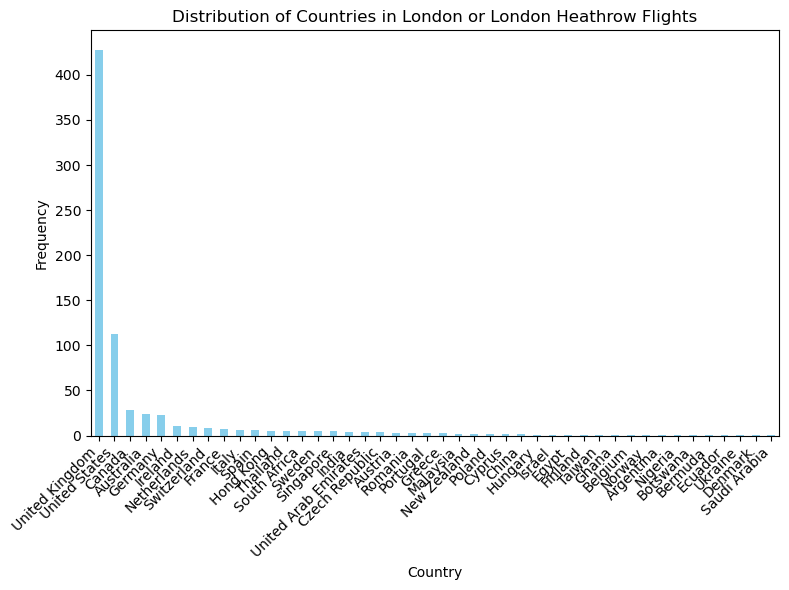

In [35]:
# Count the occurrences of each country
country_counts = london_df['country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
country_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Distribution of Countries in London or London Heathrow Flights')
plt.xlabel('Country')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [36]:
def filter_reviews_and_percentage(df, word='staff'):
    """
    Filter the DataFrame to contain only the reviews containing the specified word.
    Print out the percentage of reviews containing the specified word.

    Args:
    - df: DataFrame containing the 'review' column.
    - word: The word to search for in the 'review' column. Default is 'food'.

    Returns:
    - DataFrame containing only the reviews containing the specified word.
    """

    # Filter the DataFrame to contain only the reviews containing the specified word
    filtered_df = df[df['review'].str.contains(word, case=False)]

    # Calculate the percentage of reviews containing the specified word
    total_reviews = len(df)
    reviews_with_word = len(filtered_df)
    percentage = (reviews_with_word / total_reviews) * 100

    # Print out the percentage
    print(f"Percentage of reviews containing the word '{word}': {percentage:.2f}%")

    # Return the filtered DataFrame
    return filtered_df

# Example usage:
# Assuming df is your DataFrame containing the 'review' column

In [37]:
# london_df.to_csv(os.path.join(parent_dir, 'dataset', 'london_airport.csv'))

In [38]:
staff_df = filter_reviews_and_percentage(london_df, 'staff')
staff_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_staff.csv'))

Percentage of reviews containing the word 'staff': 35.50%


### Plane Experience (non-economy class)

#### Food Analysis

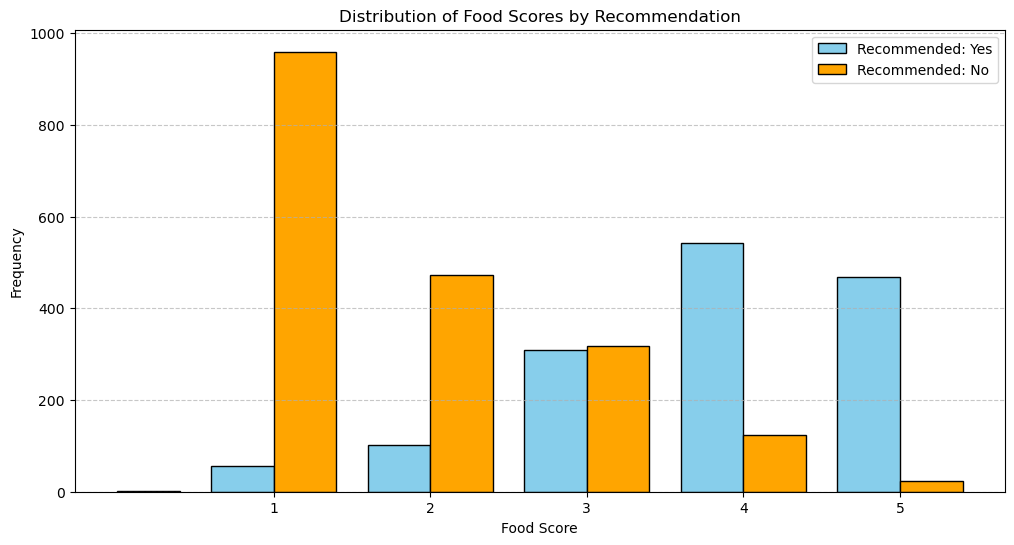

In [39]:
recommended_yes = df[df['recommended'] == True]['food'].value_counts().sort_index()
recommended_no = df[df['recommended'] == False]['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting recommended == 'Yes'
plt.bar(recommended_yes.index - 0.2, recommended_yes.values, width=0.4, color='skyblue', label='Recommended: Yes', edgecolor='black')

# Plotting recommended == 'No'
plt.bar(recommended_no.index + 0.2, recommended_no.values, width=0.4, color='orange', label='Recommended: No', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Recommendation')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

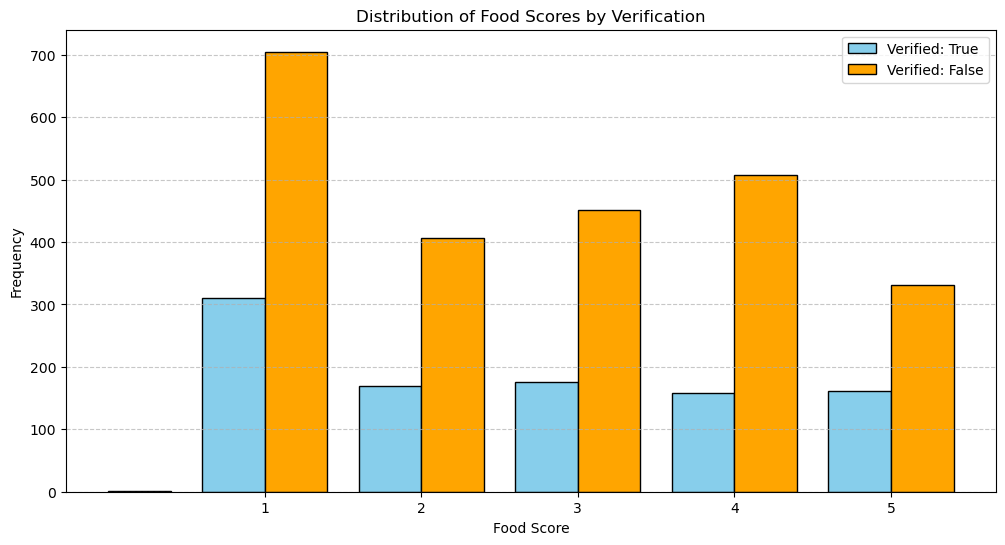

In [40]:
# Filter the DataFrame for verified == True and verified == False
verified_true = df[df['verified'] == True]['food'].value_counts().sort_index()
verified_false = df[df['verified'] == False]['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting verified == True
plt.bar(verified_true.index - 0.2, verified_true.values, width=0.4, color='skyblue', label='Verified: True', edgecolor='black')

# Plotting verified == False
plt.bar(verified_false.index + 0.2, verified_false.values, width=0.4, color='orange', label='Verified: False', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Verification')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# Distribution for food are the same between Verified and non-verified

In [42]:
## Filter out people in the Economy Class that have bad ground service experience
food_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['food'] <= 2)]

In [43]:
food_df = food_df[['verified','month_year_fly','country', 'aircraft','type','food','money_value', 'recommended', 'review']]

In [44]:
food_df.dropna(subset=['food'])
food_df.shape

(716, 9)

In [45]:
food_df.head()

,verified,month_year_fly,country,aircraft,type,food,money_value,recommended,review
1,True,2024-03-01,United Kingdom,Boeing 777-200,Couple Leisure,1.0,3,False,Flew business class from Doha to London on 31s...
2,True,2024-03-01,United Kingdom,Boeing 777-200,Couple Leisure,1.0,1,False,This is the first time I have seen the new Clu...
12,True,2024-03-01,United Kingdom,A321,Business,2.0,1,False,Waited an hour to check-in at the Paphos busin...
15,True,2024-03-01,Belgium,Boeing 777,Solo Leisure,2.0,2,False,Boarding started with a delay of some 20 minut...
18,True,2024-03-01,United Kingdom,Boeing 777-300ER,Solo Leisure,1.0,1,False,"BA First, it's not even the best business clas..."


In [46]:
food_df.groupby('recommended')['recommended'].count()

recommended
False    653
True      63
Name: recommended, dtype: int64

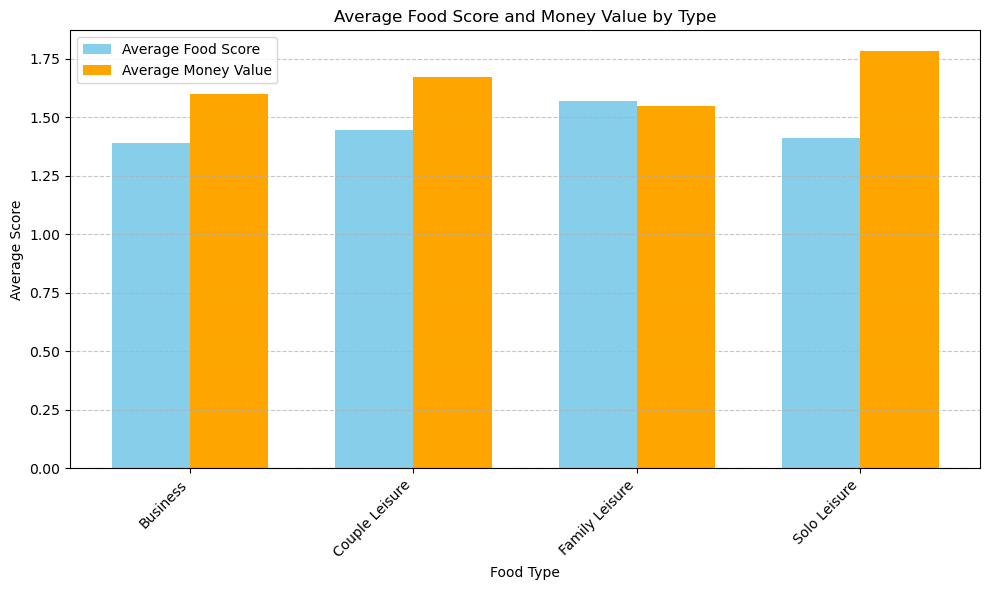

In [47]:
# Group by 'type' and calculate the average food score and money value
average_scores = food_df.groupby('type').agg({'food': 'mean', 'money_value': 'mean'})

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Index for the x-axis
ind = range(len(average_scores))

# Plotting average food score
plt.bar(ind, average_scores['food'], bar_width, label='Average Food Score', color='skyblue')

# Plotting average money value
plt.bar([i + bar_width for i in ind], average_scores['money_value'], bar_width, label='Average Money Value', color='orange')

# Setting labels, title, and ticks
plt.xlabel('Food Type')
plt.ylabel('Average Score')
plt.title('Average Food Score and Money Value by Type')
plt.xticks([i + bar_width / 2 for i in ind], average_scores.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

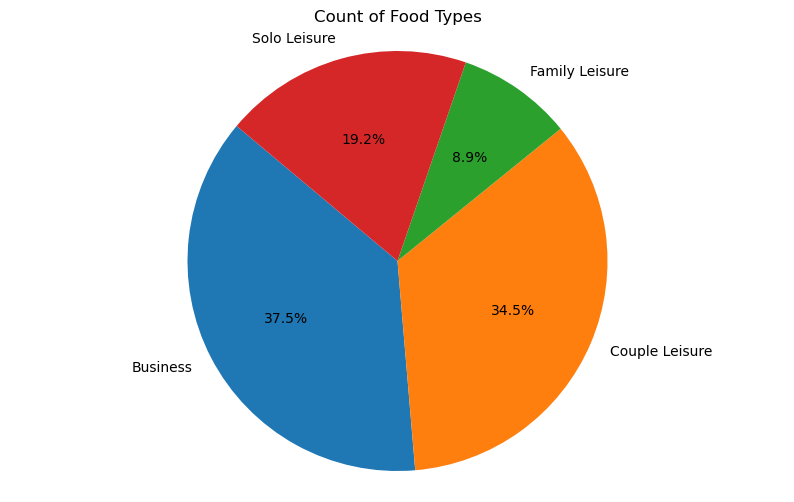

In [48]:
# Sample data
average_scores = food_df.groupby('type').agg({'food': 'count'})

# Plotting the pie chart for count only
plt.figure(figsize=(10, 6))

# Plotting pie chart
plt.pie(average_scores['food'], labels=average_scores.index, autopct='%1.1f%%', startangle=140)

# Setting title
plt.title('Count of Food Types')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

In [49]:
# Mostly business and couple

In [50]:
bad_food_df = filter_reviews_and_percentage(food_df,'food')
bad_food_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_food.csv'))

Percentage of reviews containing the word 'food': 57.54%


#### Seat Comfort Analysis

In [51]:
## Filter out people in the Economy Class that have bad ground service experience
seat_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['seat_comfort'] <= 2)]

In [52]:
seat_df = seat_df[['verified','month_year_fly','country', 'aircraft','type','seat_comfort','aircraft_1','aircraft_2','money_value', 'recommended', 'review']]

In [53]:
seat_df.dropna(subset=['seat_comfort'])
seat_df.shape

(636, 11)

In [54]:
seat_df.head()

,verified,month_year_fly,country,aircraft,type,seat_comfort,aircraft_1,aircraft_2,money_value,recommended,review
12,True,2024-03-01,United Kingdom,A321,Business,2.0,A321,NaN,1,False,Waited an hour to check-in at the Paphos busin...
13,False,2024-03-01,Singapore,Boeing 777-300,Business,1.0,B777,NaN,1,False,"Not a great experience at all, from the outset..."
14,True,2024-03-01,Belgium,A320,Solo Leisure,2.0,A320,NaN,3,True,Boarding was difficult caused by vast majority...
18,True,2024-03-01,United Kingdom,Boeing 777-300ER,Solo Leisure,2.0,B777,NaN,1,False,"BA First, it's not even the best business clas..."
19,True,2024-03-01,Australia,Boeing 777-300,Business,1.0,B777,NaN,2,False,The worst business class experience. Ground cr...


In [55]:
def calculate_aircraft_score(df):
    # Accessing specific columns using [['column_name']]
    aircraft_1 = df[['aircraft_1', 'seat_comfort']]
    aircraft_2 = df[['aircraft_2', 'seat_comfort']]

    # Concatenating the DataFrames
    aircraft = pd.concat([aircraft_1, aircraft_2], axis=0)

    aircraft = aircraft[['aircraft_1', 'seat_comfort']]
    aircraft = aircraft.rename(columns={'aircraft_1': 'aircraft'})

    # Drop rows with NaN or NA values
    aircraft = aircraft.dropna()

    # Group by 'aircraft' and calculate count and average seat comfort
    summary = aircraft.groupby('aircraft').agg({'seat_comfort': ['count', 'mean']}).reset_index()
    summary.columns = ['aircraft', 'count', 'average_seat_comfort']
    # Sort DataFrame by count
    summary = summary.sort_values(by='count', ascending=False)

    # Filter aircraft with count > 10
    summary = summary[summary['count'] > 10]

    # Create dual axes plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot count of aircraft on the first axis
    color = 'tab:blue'
    ax1.bar(summary['aircraft'], summary['count'], color=color, label='Count')
    ax1.set_xlabel('Aircraft')
    ax1.set_ylabel('Count', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create second axis for average seat comfort
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.plot(summary['aircraft'], summary['average_seat_comfort'], color=color, marker='o', label='Average Seat Comfort')
    ax2.set_ylabel('Average Seat Comfort', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legend
    plt.title('Count and Average Seat Comfort by Aircraft (Ordered by Count)')
    fig.tight_layout()
    plt.show()

    return aircraft

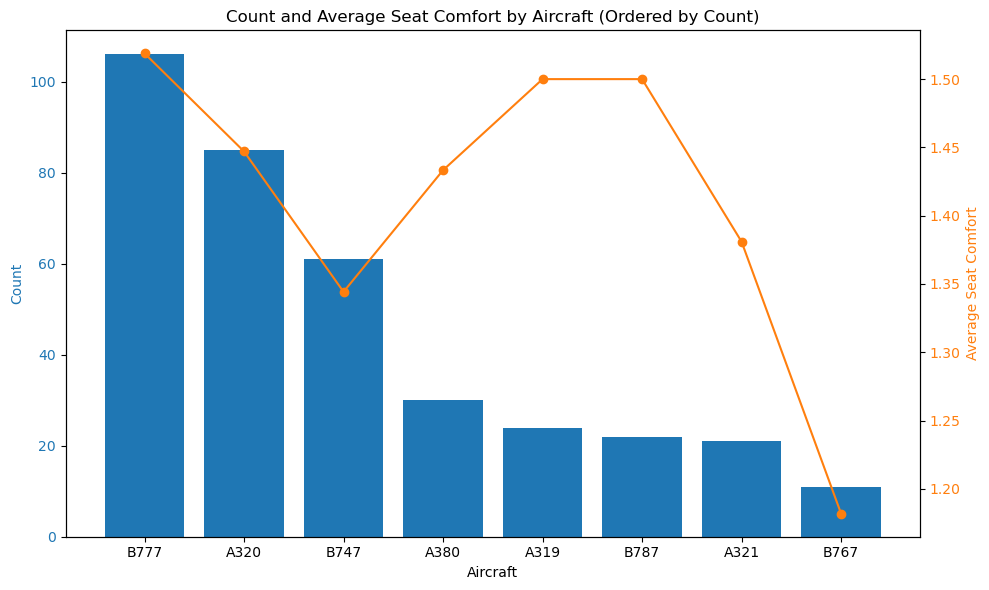

In [56]:
aircraft = calculate_aircraft_score(seat_df)

In [57]:
bad_seat_df = filter_reviews_and_percentage(seat_df)
bad_seat_df.to_csv(os.path.join(parent_dir, 'dataset', 'bad_seat.csv'))

Percentage of reviews containing the word 'staff': 30.19%


## TIme Series Analysis

### General Time Time Series

In [58]:
# Convert 'Month Year Flown' column to datetime data type
df['month_year_fly'] = pd.to_datetime(df['month_year_fly'])

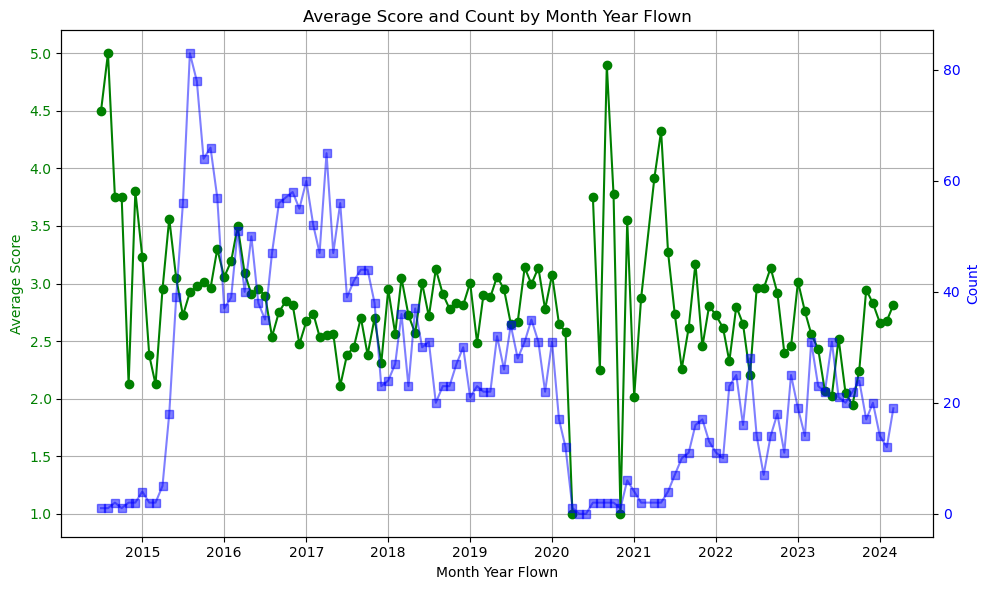

In [59]:
# Drop NaN values from the 'month_year_fly' column
df_filtered = df.dropna(subset=['month_year_fly'])

# Calculate the average score and count for each 'Month Year Flown'
average_score_and_count_by_month_year = df_filtered.groupby('month_year_fly')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month_year = average_score_and_count_by_month_year.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color1 = 'green'
ax1.set_xlabel('Month Year Flown')
ax1.set_ylabel('Average Score', color=color1)
ax1.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['mean'], color=color1, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Count', color=color2)
ax2.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['count'], color=color2, marker='s', linestyle='-', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Year Flown')
plt.xticks(rotation=45)

# Add gridlines to the plot
ax1.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


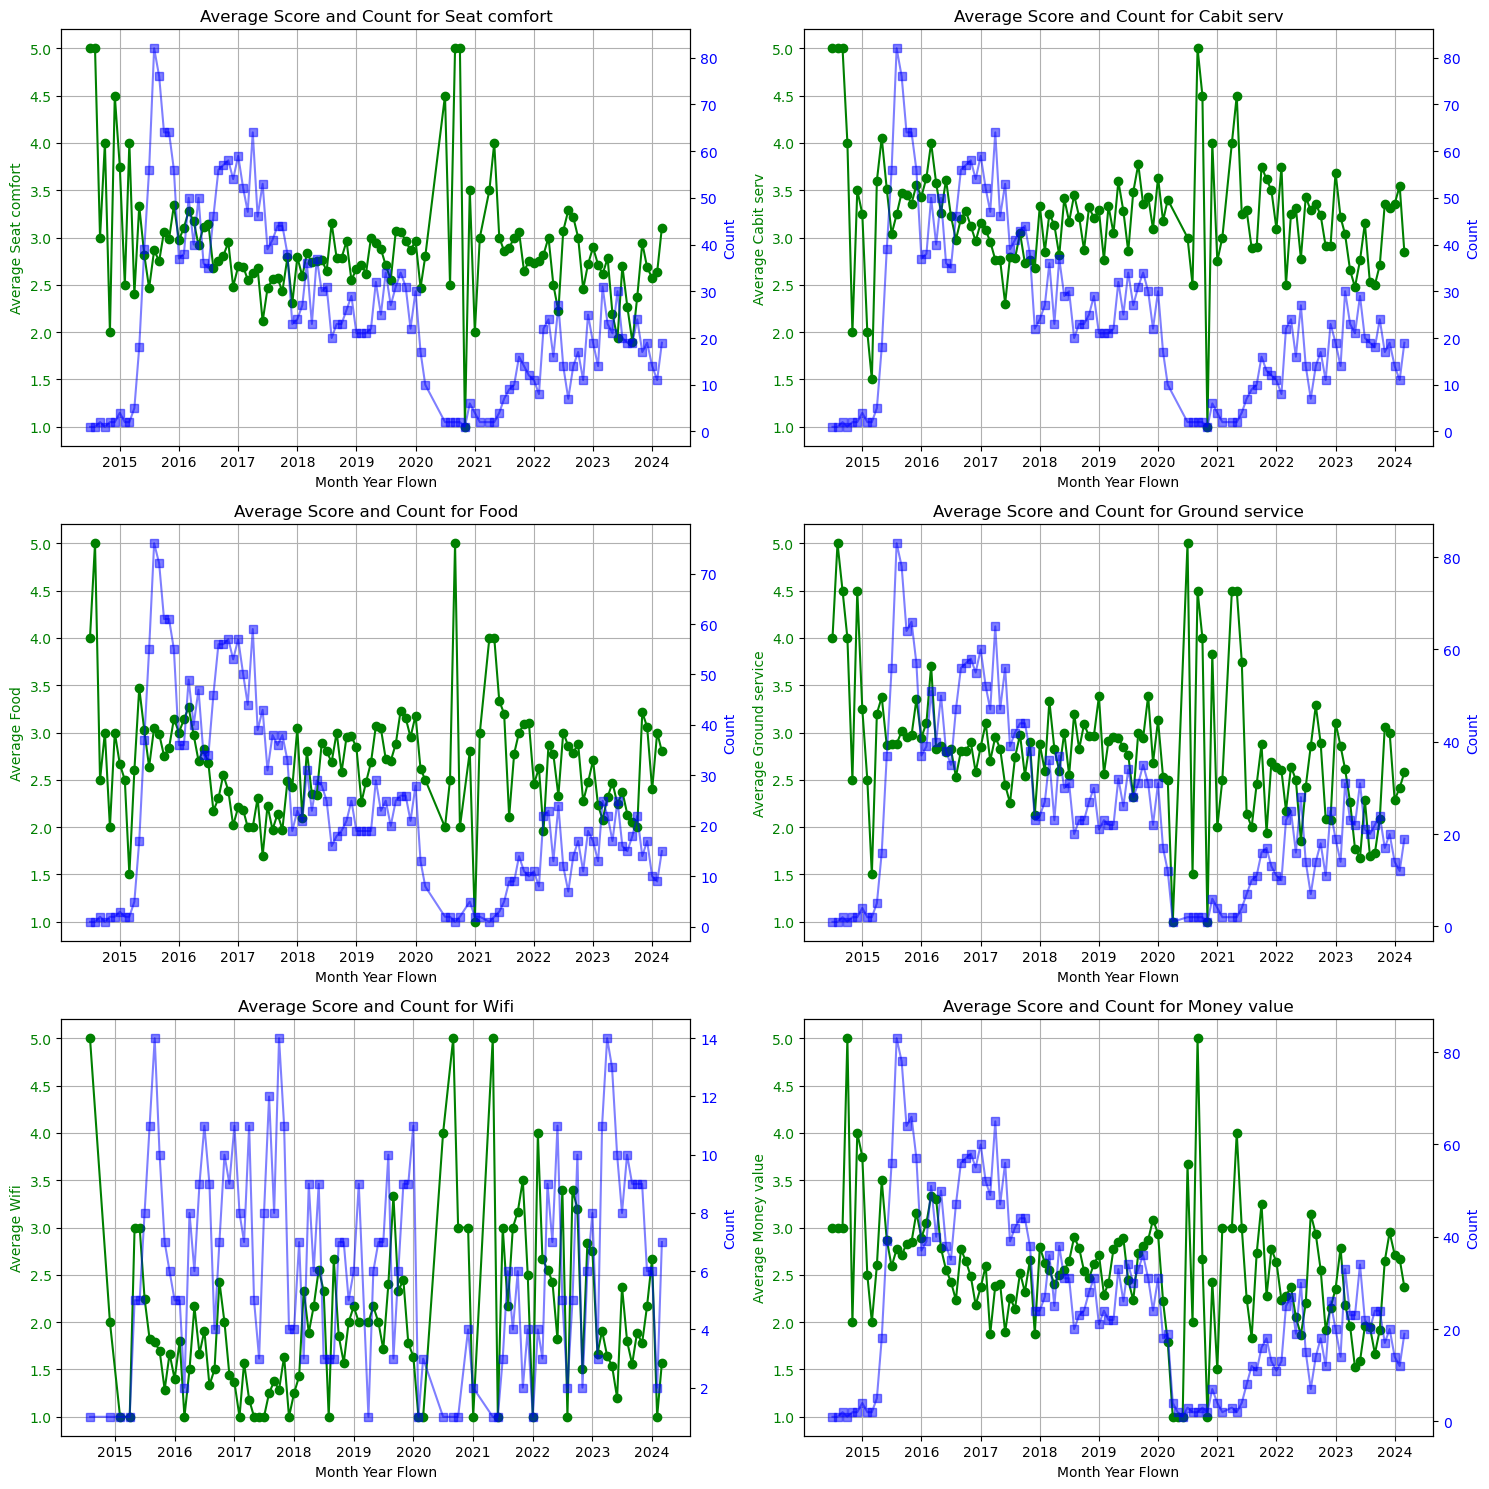

In [60]:
# Define the list of columns
columns_to_plot = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each column and plot the average score and count by date flown
for i, column in enumerate(columns_to_plot):
    # Filter out NaN values in the specified column
    filtered_data = df.dropna(subset=['month_year_fly', column])
    
    # Group by 'Month Year Flown' to calculate the average and count
    average_score_and_count = filtered_data.groupby('month_year_fly')[column].agg(['mean', 'count'])
    average_score_and_count = average_score_and_count.sort_index()

    # Plot the average score for each date using a line plot
    color1 = 'green'
    axes[i].plot(average_score_and_count.index, average_score_and_count['mean'], marker='o', color=color1, linestyle='-')
    axes[i].set_xlabel('Month Year Flown')
    axes[i].set_ylabel('Average ' + column.replace("_", " ").capitalize(), color=color1)
    axes[i].tick_params(axis='y', labelcolor=color1)
    axes[i].grid(True)

    # Plot the count for each date using a line plot
    ax2 = axes[i].twinx()
    color2 = 'blue'
    ax2.plot(average_score_and_count.index, average_score_and_count['count'], color=color2, linestyle='-', marker='s', alpha=0.5)
    ax2.set_ylabel('Count', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    axes[i].set_title('Average Score and Count for ' + column.replace("_", " ").capitalize())

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Monthly Time Series

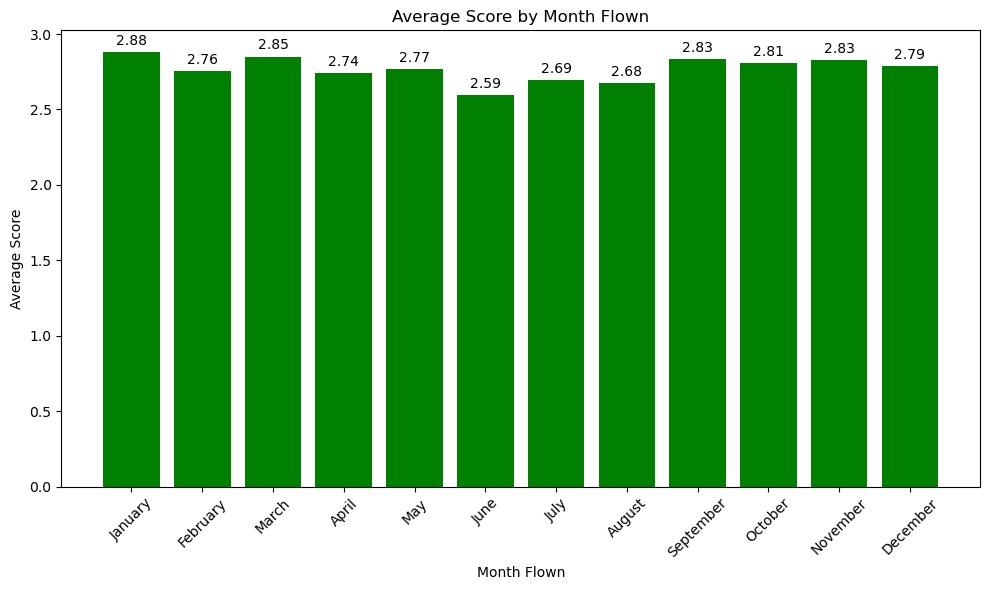

In [61]:
# Calculate the average score for each month
average_score_by_month = df.groupby('month_fly_num')['score'].mean()

# Sort the index to ensure the bar chart is ordered by month
average_score_by_month = average_score_by_month.sort_index()

# Get month names to use as labels
month_names = df.groupby('month_fly_num')['month_fly'].first()

# Plot the average score for each month using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_names, average_score_by_month, color='green')
plt.xlabel('Month Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


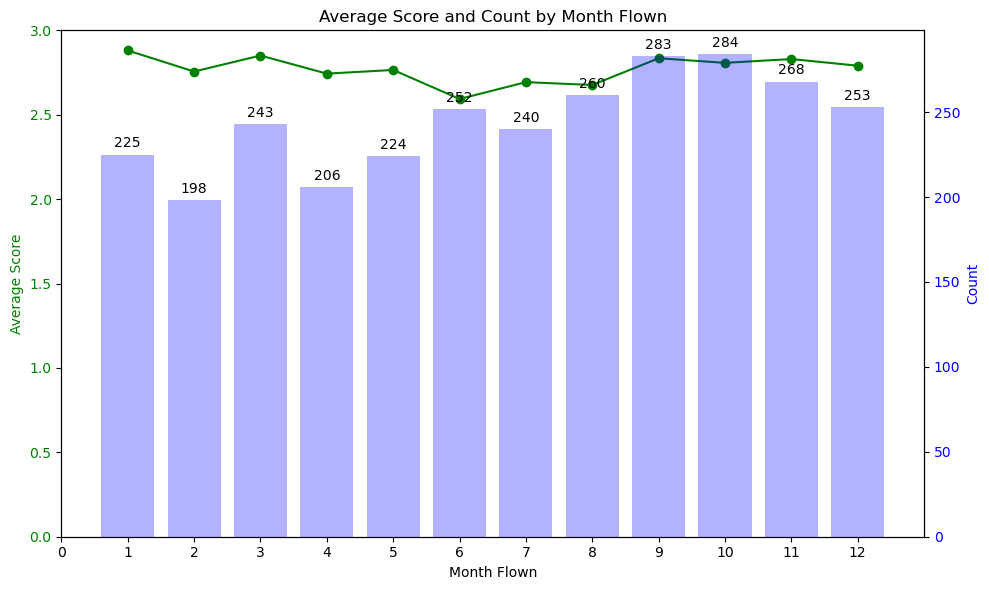

In [62]:
# Filter out NaN values from the 'Month Flown' column and calculate the average score and count for each month
average_score_and_count_by_month = df.dropna(subset=['month_fly_num']).groupby('month_fly_num')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month = average_score_and_count_by_month.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color = 'green'
ax1.set_xlabel('Month Flown')
ax1.set_ylabel('Average Score', color=color)
ax1.plot(average_score_and_count_by_month.index, average_score_and_count_by_month['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis limit from 0 to 3
ax1.set_ylim(0, 3)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Count', color=color)
bars = ax2.bar(average_score_and_count_by_month.index, average_score_and_count_by_month['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Flown')
plt.xticks(range(13))  # Set x-axis ticks from 0 to 12
plt.xlim(0, 13)  # Set x-axis limit to start from 0 and end at 12

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [63]:
### Summer Month Seems to be a problem